In [14]:
from tensorflow.keras.preprocessing.text import one_hot

In [15]:
import string
with open('sentences.txt', encoding='utf-8') as f:
    text = f.read().split('\n')

sentences = []
for sentence in text:
    # Remove punctuation and digits
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    sentence = ''.join(char for char in sentence if not char.isdigit())
    # Strip extra whitespace and add to the list if it's not empty
    if sentence.strip():
        sentences.append(sentence.strip())

In [16]:
sentences

['In recent years the field of data science has rapidly evolved driven by advancements in artificial intelligence AI and machine learning As industries increasingly rely on datadriven insights to make strategic decisions the demand for skilled professionals in this domain has surged Educational institutions are adapting their curricula to equip students with the knowledge and skills needed for these roles focusing on statistical analysis programming and AI technologies The job market is witnessing a growing number of opportunities in data science as companies across various sectors seek experts to harness big data and AI for competitive advantage This trend highlights the importance of staying current with technological advancements and continuously updating ones skill set to thrive in this dynamic field']

In [17]:
vocab_size = 100

In [18]:
onehot_rep = [one_hot(sent, vocab_size) for sent in sentences]
# onehot_rep

In [19]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [20]:
import numpy as np

sent_length = 20

embedded_docs = pad_sequences(onehot_rep, padding='pre', maxlen=sent_length)
embedded_docs

array([[97,  2,  9, 74, 66, 49, 81,  9, 45, 23, 69, 86, 35, 73, 61, 56,
        99, 78, 36, 93]])

In [21]:
dim = 7

model = Sequential()
model.add(Embedding(vocab_size,7))
model.compile('adam', 'mse')

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# print(model.predict(embedded_docs))

In [24]:
predictions = model.predict(embedded_docs)

# predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [25]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

def reduce_embeddings(M, k=2):
    n_iters = 10
    print(f"Original shape: {M.shape}")

    sentences, words_per_sentence, embedding_dim = M.shape
    M_reshaped = M.reshape(sentences * words_per_sentence, embedding_dim)
    
    print(f"Reshaped to: {M_reshaped.shape}")
    
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced = svd.fit_transform(M_reshaped)
    
    print("Done.")
    return M_reduced


reduced_embeddings = reduce_embeddings(predictions, k=2)
print(reduced_embeddings)


Original shape: (1, 20, 7)
Reshaped to: (20, 7)
Done.
[[ 0.05548149 -0.03963394]
 [-0.07377308 -0.02236178]
 [-0.00108409  0.00684897]
 [-0.00714944  0.03552108]
 [-0.03257116 -0.04583952]
 [-0.0773149   0.01044391]
 [-0.03212837 -0.05408311]
 [-0.00108409  0.00684897]
 [ 0.00987988  0.04438889]
 [ 0.04914901 -0.03744678]
 [-0.02916247 -0.06211059]
 [ 0.04758379 -0.03992632]
 [-0.01517424 -0.00883375]
 [ 0.04794349  0.03751826]
 [-0.07760044  0.04072841]
 [-0.02796553  0.03215241]
 [ 0.03713105  0.02141052]
 [ 0.01106069 -0.04507251]
 [ 0.0597322  -0.04287114]
 [-0.07163699 -0.05969778]]


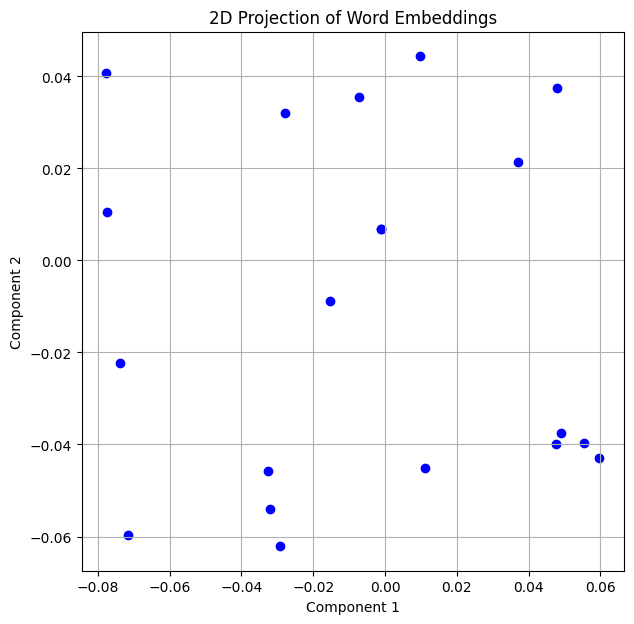

In [26]:
custom_words = ['fox', 'jumps', 'yoga', 'meditation', 'global', 'market', 'chef']
import matplotlib.pyplot as plt

def plot_embeddings(M_reduced, custom_words):
    plt.figure(figsize=(7, 7))
    
    plt.scatter(M_reduced[:, 0], M_reduced[:, 1], c='blue', marker='o')
    
    # for i, word in enumerate(custom_words):
    #     plt.text(M_reduced[i, 0], M_reduced[i, 1], word, fontsize=12, ha='right')
    
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('2D Projection of Word Embeddings')
    plt.grid(True)
    plt.show()

# Example usage
plot_embeddings(reduced_embeddings, custom_words)
